In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import get_file

from deepcell.utils.plot_utils import create_rgb_image
from deepcell.datasets import Dataset
from deepcell_spots.applications import SpotDetection

/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
def load_data(self, path=None):
    path = path if path else self.path
    
    basepath = os.path.expanduser(os.path.join('~', '.keras', 'datasets'))
    prefix = path.split(os.path.sep)[:-1]
    data_dir = os.path.join(basepath, *prefix) if prefix else basepath
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    elif not os.path.isdir(data_dir):
        raise IOError('{} exists but is not a directory'.format(data_dir))

    path = get_file(path,
                    origin=self.url,
                    file_hash=self.file_hash)
    
    data = np.load(path)
    spots_image = data['spots_image']
    spots_image = np.swapaxes(spots_image, 3, 0)
    
    return spots_image

Dataset.load_data = load_data

In [3]:
datafile = Dataset(
    path='MERFISH_example.npz',
    url='https://deepcell-data.s3.us-west-1.amazonaws.com/spot_detection/multiplex/Moffitt/MERFISH_example.npz',
    file_hash='2cd7ce177b503fd0873125784097622b',
    metadata={})
spots_image = datafile.load_data()
spots_image.shape

(20, 500, 500, 1)

In [4]:
app = SpotDetection()

2023-03-18 16:00:45.505422: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 16:00:47.094592: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 37502 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0


In [5]:
pred = app.predict(spots_image, clip=True, threshold=0.5)

2023-03-18 16:00:51.639624: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2023-03-18 16:00:54.114949: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
/usr/local/lib/python3.8/dist-packages/deepcell_spots/postprocessing_utils.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(dot_centers)


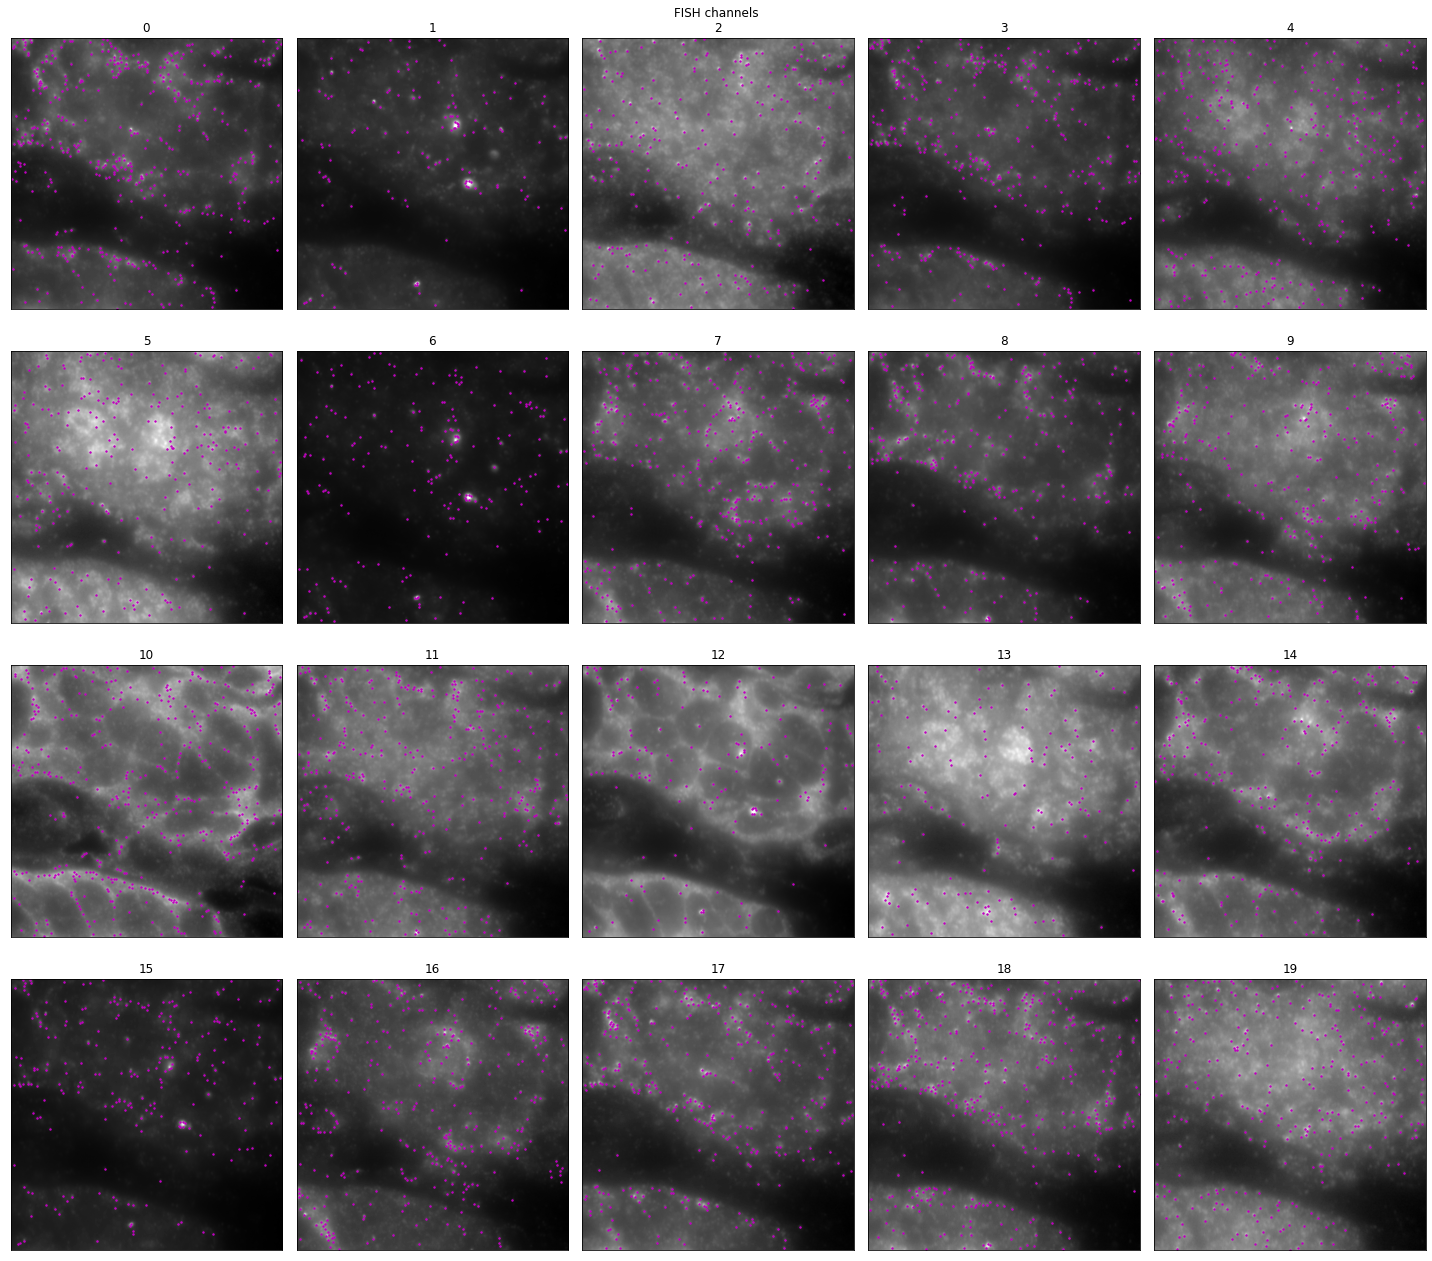

In [6]:
fig,ax = plt.subplots(4,5,figsize=(20, 18))

for idx, ax_d in enumerate(ax.flatten()):
    ax_d.imshow(spots_image[idx,...,0], cmap='gray')
    ax_d.scatter(pred[idx][:,1], pred[idx][:,0], c='m', s=2)
    ax_d.set_title(idx)
    ax_d.set_xticks([])
    ax_d.set_yticks([])

plt.suptitle('FISH channels')
plt.tight_layout()

plt.show()